### **DOMAIN**: Electronics and Telecommunication
#### CONTEXT: A communications equipment manufacturing company has a product which is responsible for emittinginformative signals.Company wants to build a deep learning model which can help the company to predict theequipment’s signal quality using various parameters. DATASET DESCRIPTION: The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters. 
2. Signal_Quality: Final signal strength or quality. 

 PROJECT OBJECTIVE: To build a classifier which can use the given parameters to determine the signal strength orquality. 

# 1. Data import and Understanding

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/rahultheogre/datasets/main/Signal.csv')

In [3]:
data.head(10)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- Data has 1599 rows and 12 columns.
- No null values
- 11 features to process and the last feature 'Signal_Strength' to predict




In [5]:
# checking missing values 

def missing_values (data): 
    print("Missing value percentage per feature is as follows:")
    return data.isnull().sum() /len(data)*100    
    
missing_values(data)    

Missing value percentage per feature is as follows:


Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

So, there are no Missing/ Null values

In [6]:
# Checking duplicate values

def duplicate_(data):  
  x =  data.duplicated().sum()
  if x != 0:
    print(f'The dataset has {x} duplicate rows')
  else:
    print(f'There are no duplicate rows')
    
duplicate_(data)  

The dataset has 240 duplicate rows


In [7]:
#dropping duplicate rows

data.drop_duplicates(inplace=True)
print("After dropping the duplicate rows, the shape of the data set is:")
data.shape

After dropping the duplicate rows, the shape of the data set is:


(1359, 12)

### Visualizing the target feature

In [8]:
data['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

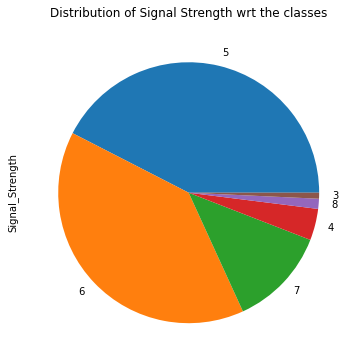

In [9]:
data['Signal_Strength'].value_counts().plot(kind='pie', figsize=(8, 6))
plt.title("Distribution of Signal Strength wrt the classes", y=1.02)
plt.show()

# 2. Data preprocessing

In [10]:
# splitting data into X and Y
X = data.drop('Signal_Strength',axis=1) 
y = data['Signal_Strength'] 

In [11]:
print(X.shape)
print(y.shape)

(1359, 11)
(1359,)


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
y.shape

(1359,)

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [17]:
print(X.shape)
print(y.shape)

(3462, 11)
(3462,)


In [18]:
# splitting the data into train & test with 70:30 proportion

# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_play, X_test, y_play, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) 

X_play.shape, X_test.shape, y_play.shape, y_test.shape

((2769, 11), (693, 11), (2769,), (693,))

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_play, 
                                                    y_play, 
                                                    test_size=0.2, 
                                                    random_state=42) 

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2215, 11), (554, 11), (2215,), (554,))

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
#normalize the dataset using standard scaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [24]:
y_train.shape

(2215, 6)

# Onto Neural Network

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

In [26]:
metrics = ['accuracy',
    Precision(name='precision'),
    Recall(name='recall')
]

2022-11-11 19:11:59.869928: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [27]:
def evolution(model, epochs):
    epochs = range(1,epochs+1)
    
    plt.figure(figsize=(20, 25))
    
    plt.subplot(4, 2, 1)
    loss_train = model.history['loss']
    loss_val = model.history['val_loss']
    plt.plot(epochs, loss_train, 'g', label='Training loss')
    plt.plot(epochs, loss_val, 'b', label='validation loss')
    plt.title('Loss Function Evolution')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    
    plt.subplot(4, 2, 2)
    accuracy_train = model.history['accuracy']
    accuracy_val = model.history['val_accuracy']
    plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
    plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
    plt.title('Accuracy Function Evolution')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()


    plt.subplot(4, 2, 3)
    precision_train = model.history['precision']
    precision_val = model.history['val_precision']
    plt.plot(epochs, precision_train, 'g', label='Training precision')
    plt.plot(epochs, precision_val, 'b', label='validation precision')
    plt.title('Precision Function Evolution')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()



    plt.subplot(4, 2, 4)
    recall_train = model.history['recall']
    recall_val = model.history['val_recall']
    plt.plot(epochs, recall_train, 'g', label='Training recall')
    plt.plot(epochs, recall_val, 'b', label='validation recall')
    plt.title('Recall Function Evolution')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
  

    return()

In [28]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience = 2, verbose=1,factor=0.3, 
                                            min_lr=0.000001)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Softmax, Input, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

### Defining a function to run multiple networks

In [30]:
def network(model, epochs, X_train, y_train, X_test, y_test):
    print(model.summary())
    
    model.compile(loss='categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = metrics)
    
    train = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=epochs, callbacks = [learning_rate_reduction])

    print('-'*20)
    evolution(train, epochs)

### Model 1

In [31]:
model1 = Sequential([
                    Input(shape=(11,)),   ## Input layer
                    Dense(256, activation='relu'), 
                    Dense(112, activation='relu'),               
                    Dense(56, activation='relu'), 
                    Dense(28, activation='relu'), 
                    Dense(14, activation='relu'), 
                    Dense(7, activation='relu'), 
                    Dense(6, activation='softmax')]) ## Output layer 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               3072      
_________________________________________________________________
dense_1 (Dense)              (None, 112)               28784     
_________________________________________________________________
dense_2 (Dense)              (None, 56)                6328      
_________________________________________________________________
dense_3 (Dense)              (None, 28)                1596      
_________________________________________________________________
dense_4 (Dense)              (None, 14)                406       
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 4

2022-11-11 19:12:00.367981: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


70/70 [==============================] - 2s 12ms/step - loss: 1.5746 - accuracy: 0.3499 - precision: 0.6260 - recall: 0.0348 - val_loss: 1.3143 - val_accuracy: 0.5180 - val_precision: 0.7540 - val_recall: 0.1371
Epoch 2/50
70/70 [==============================] - 0s 6ms/step - loss: 1.1019 - accuracy: 0.5797 - precision: 0.7920 - recall: 0.2939 - val_loss: 0.8994 - val_accuracy: 0.6335 - val_precision: 0.7572 - val_recall: 0.4949
Epoch 3/50
70/70 [==============================] - 0s 6ms/step - loss: 0.8505 - accuracy: 0.6483 - precision: 0.7417 - recall: 0.5327 - val_loss: 0.8182 - val_accuracy: 0.6840 - val_precision: 0.7904 - val_recall: 0.5007
Epoch 4/50
70/70 [==============================] - 0s 5ms/step - loss: 0.7291 - accuracy: 0.7169 - precision: 0.7957 - recall: 0.6086 - val_loss: 0.7681 - val_accuracy: 0.6941 - val_precision: 0.7816 - val_recall: 0.5887
Epoch 5/50
70/70 [==============================] - 0s 6ms/step - loss: 0.6645 - accuracy: 0.7372 - precision: 0.8168 - re

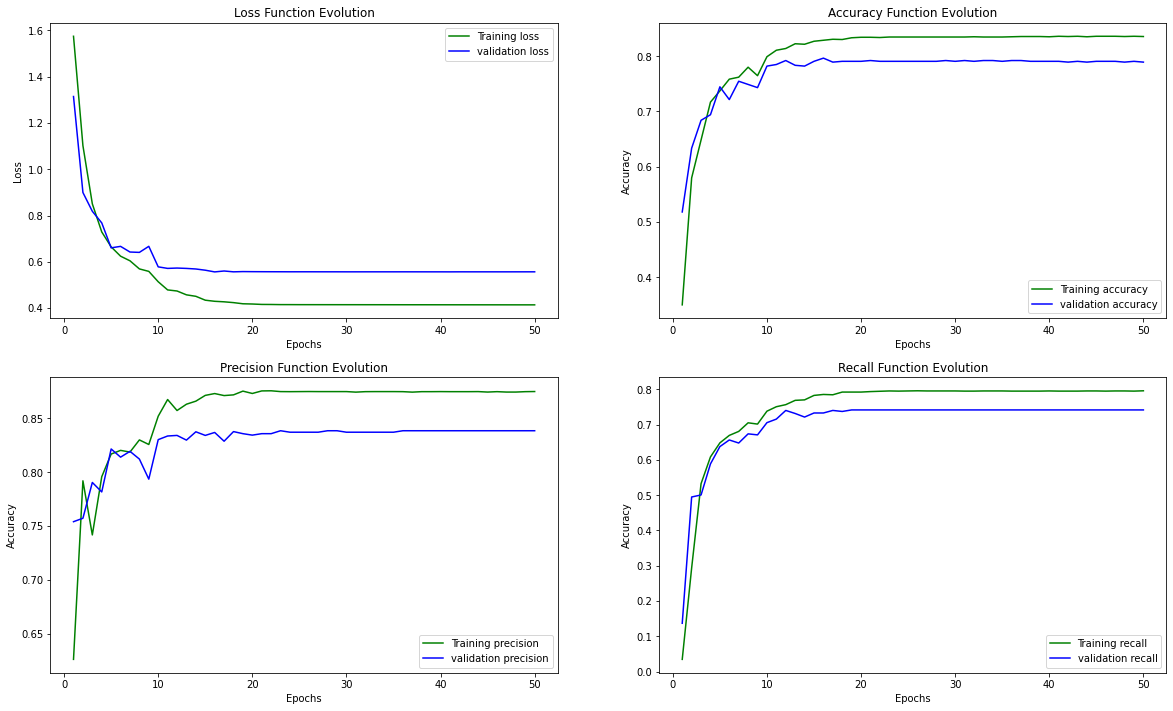

In [32]:
network(model1, 50, X_train, y_train, X_test, y_test)

Even after 10 epochs, we see a sharp decrease in testing accuracy and similar increase in the training one. We will test a different network

### Model 2

In [33]:
model2 = Sequential([
                    Input(shape=(11,)),   ## Input layer
                    Dense(256, activation='relu'),
                    Dropout(0.2),    
                    Dense(112, activation='relu'),               
                    Dense(56, activation='relu'),
                    BatchNormalization(),
                    Dense(28, activation='relu'), 
                    Dense(14, activation='relu'), 
                    Dropout(0.2),
                    Dense(7, activation='relu'), 
                    Dense(6, activation='softmax')]) ## Output layer 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               3072      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 112)               28784     
_________________________________________________________________
dense_9 (Dense)              (None, 56)                6328      
_________________________________________________________________
batch_normalization (BatchNo (None, 56)                224       
_________________________________________________________________
dense_10 (Dense)             (None, 28)                1596      
_________________________________________________________________
dense_11 (Dense)             (None, 14)               

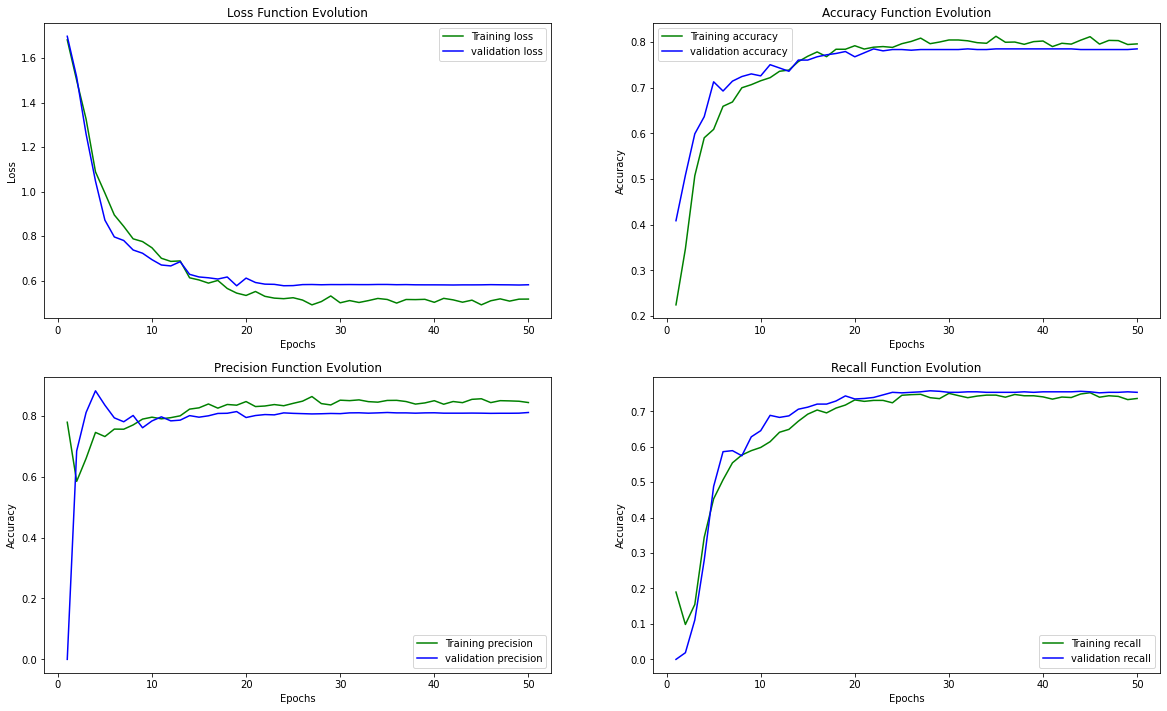

In [34]:
network(model2, 50, X_train, y_train, X_test, y_test)

I am satisfied with the second model. It shows no sign of overfitting and does and excellent job of prediction with 80 percent accuracy. The accuracy, recall, precision and loss, all are well balanced. 

In [35]:
y_pred = model2.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

In [36]:
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, classification_report, recall_score

In [37]:
print('Average Precision Score is:', precision_score(y_test,y_pred, average='weighted'))
print('Average Recall Score is:', recall_score(y_test, y_pred, average='weighted'))
print('Confusion Matrix is:\n', confusion_matrix(y_test, y_pred))

Average Precision Score is: 0.7746250802735631
Average Recall Score is: 0.784992784992785
Confusion Matrix is:
 [[122   0   0   0   0   0]
 [  1  90   4   3   0   0]
 [  4  14  79  26   5   0]
 [  2  10  28  53  18   4]
 [  1   0   2  20  91   6]
 [  0   0   0   0   1 109]]


In [38]:
print("Test Classification Report",classification_report(y_test,y_pred))

Test Classification Report               precision    recall  f1-score   support

           0       0.94      1.00      0.97       122
           1       0.79      0.92      0.85        98
           2       0.70      0.62      0.66       128
           3       0.52      0.46      0.49       115
           4       0.79      0.76      0.77       120
           5       0.92      0.99      0.95       110

    accuracy                           0.78       693
   macro avg       0.78      0.79      0.78       693
weighted avg       0.77      0.78      0.78       693



- We built a neural network from scratch using Keras TensorFlow. 
- A graph plotting changes in training and testing accuracy was plotted alongside.
- The dataset was very small with very less number of features. So even though we upsampled the data, we could not achieve an averag accuracy of greater than 80 percent.
- But we were happy to achieve equally good recall and precision scores.